In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Read data from Excel
df = pd.read_excel("Placement_Data.xlsx")

In [2]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [3]:
def preprocess_text(text):
    words = word_tokenize(text)
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['text'] = df['text'].apply(preprocess_text)
df['text']

0                excit job opportun lead tech compani !
1       unsatisfactori work environ , would recommend .
2                     great team , fantast workplac ! '
3                          terribl manag , avoid cost .
4                        promis career growth develop .
5                horribl work-lif balanc , stress job .
6                      awesom colleagu , pleasur work !
7                    worst experi ever , toxic cultur .
8               excit new career opportun dynam field !
9           avoid compani like plagu , terribl experi .
10              posit work atmospher , motiv colleagu .
11                     extrem disorgan , '' recommend .
12             except benefit perk , great place work !
13        unfair treatment employe , high turnov rate .
14                         innov project support team .
15              hostil work environ , constant stress .
16              challeng assign , great career growth .
17                 toxic offic polit , manag inc

In [4]:
# Split the data into training and testing sets
X = df['text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

39                   decent job stabil , unexcit task .
6                      awesom colleagu , pleasur work !
25             averag work environ , neither good bad .
9           avoid compani like plagu , terribl experi .
13        unfair treatment employe , high turnov rate .
31           flexibl work hour , limit growth potenti .
34                 posit compani cultur , room improv .
8               excit new career opportun dynam field !
17                 toxic offic polit , manag incompet .
24              excit project , great work-lif balanc .
0                excit job opportun lead tech compani !
33              adequ work-lif balanc , averag salari .
5                horribl work-lif balanc , stress job .
11                     extrem disorgan , '' recommend .
1       unsatisfactori work environ , would recommend .
29                   lack divers inclus , need improv .
21                               repetit task , excit .
2                     great team , fantast workp

In [5]:
X_test

19      horribl work-lif balanc , avoid compani .
16        challeng assign , great career growth .
15        hostil work environ , constant stress .
26          innov compani cultur , lot challeng .
4                  promis career growth develop .
12       except benefit perk , great place work !
37                  effici manag , monoton task .
27    satisfactori work experi , decent compens .
Name: text, dtype: object

In [6]:
y_train

39    Negative
6     Positive
25    Positive
9     Negative
13    Negative
31    Negative
34    Positive
8     Positive
17    Negative
24    Positive
0     Positive
33    Negative
5     Negative
11    Negative
1     Negative
29    Negative
21    Negative
2     Positive
30    Positive
36    Negative
3     Negative
35    Negative
23    Negative
32    Positive
10    Positive
22    Negative
18    Positive
20    positive
7     Negative
14    Positive
28    Positive
38    Positive
Name: sentiment, dtype: object

In [7]:
y_test

19    Negative
16    Positive
15    Negative
26    Positive
4     Positive
12    Positive
37    Positive
27    Positive
Name: sentiment, dtype: object

In [8]:
# Convert text data into TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)

MultinomialNB()

In [9]:
# Make predictions on the test set
y_pred = naive_bayes.predict(X_test_tfidf)
y_pred

array(['Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Negative', 'Negative'], dtype='<U8')

In [10]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.625

Classification Report:
               precision    recall  f1-score   support

    Negative       0.40      1.00      0.57         2
    Positive       1.00      0.50      0.67         6

    accuracy                           0.62         8
   macro avg       0.70      0.75      0.62         8
weighted avg       0.85      0.62      0.64         8



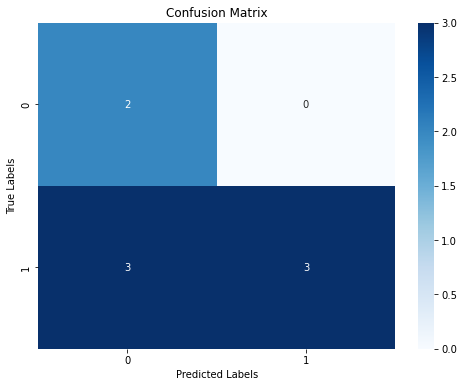

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [2]:
max_features = 5000  # Number of most frequent words to consider
max_len = 100  # Maximum sequence length
batch_size = 32

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure consistent length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [4]:
# Create the LSTM model
model = Sequential()

model.add(Embedding(max_features, 32, input_length=max_len))# Embedding layer

model.add(LSTM(100))# LSTM layer

model.add(Dense(1, activation='sigmoid'))# Output layer
#optimzer (defined loss funct.) SGD(stochastic gradient descent)
#ADAM(adaptive momentum estimation) RMSprop(adjust learnig rate) #adagrad(histroical gradient descent)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           160000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
import matplotlib.pyplot as plt

Epoch 1/10
625/625 [==============================] - 42s 64ms/step - loss: 0.4616 - accuracy: 0.7739 - val_loss: 0.3708 - val_accuracy: 0.8392
Epoch 2/10
625/625 [==============================] - 39s 62ms/step - loss: 0.3095 - accuracy: 0.8730 - val_loss: 0.3576 - val_accuracy: 0.8468
Epoch 3/10
625/625 [==============================] - 38s 60ms/step - loss: 0.2677 - accuracy: 0.8929 - val_loss: 0.3618 - val_accuracy: 0.8428
Epoch 4/10
625/625 [==============================] - 38s 61ms/step - loss: 0.2234 - accuracy: 0.9118 - val_loss: 0.3941 - val_accuracy: 0.8400
Epoch 5/10
625/625 [==============================] - 37s 60ms/step - loss: 0.1849 - accuracy: 0.9309 - val_loss: 0.4221 - val_accuracy: 0.8334
Epoch 6/10
625/625 [==============================] - 40s 63ms/step - loss: 0.1544 - accuracy: 0.9428 - val_loss: 0.4556 - val_accuracy: 0.8314
Epoch 7/10
625/625 [==============================] - 35s 56ms/step - loss: 0.1272 - accuracy: 0.9553 - val_loss: 0.5080 - val_accuracy:

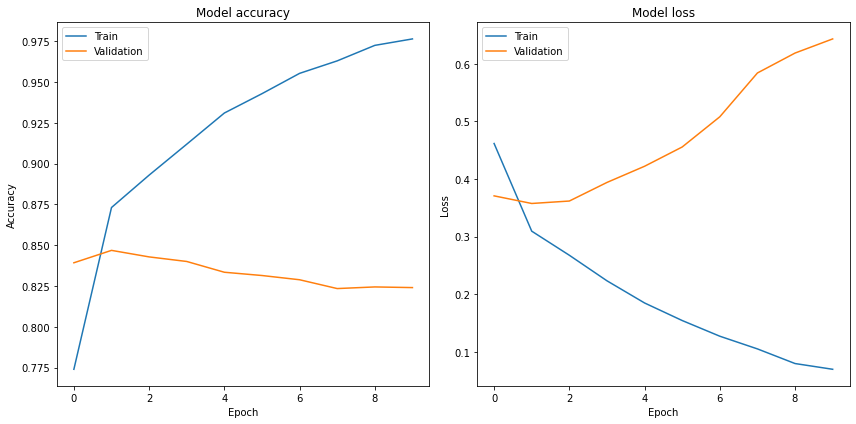

In [6]:
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [1]:
import tkinter as tk
from tkinter import ttk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import pandas as pd

# Read data from Excel
df = pd.read_excel("C:\\Users\\HP\\Desktop\\Placement_Data.xlsx")

# Preprocess the text data (same preprocessing as in the previous code)

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize, remove stop words, and apply stemming
    words = word_tokenize(text)
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['text'] = df['text'].apply(preprocess_text)

# Split the data into training and testing sets
X = df['text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)

# Create the GUI
def analyze_sentiment():
    user_input = user_entry.get()
    user_input = preprocess_text(user_input)
    input_tfidf = tfidf_vectorizer.transform([user_input])
    prediction = naive_bayes.predict(input_tfidf)
    result_label.config(text=f"Predicted Sentiment: {prediction[0]}")

# Main application window
root = tk.Tk()
root.title("Sentiment Analysis")

# User input entry
user_entry = ttk.Entry(root, width=40)
user_entry.grid(row=0, column=0, padx=10, pady=10)

# Analyze button
analyze_button = ttk.Button(root, text="Analyze Sentiment", command=analyze_sentiment)
analyze_button.grid(row=1, column=0, padx=10, pady=10)

# Result label
result_label = ttk.Label(root, text="")
result_label.grid(row=2, column=0, padx=10, pady=10)

# Run the GUI
root.mainloop()
